## Forming Pseudo-Stokes Visibilities with `hera_pspec.pstokes`

This example shows how to combine visibilities to form pseudo-Stokes visibilities.

*HERA Power Spectrum Team*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import hera_pspec as hp
from hera_pspec.data import DATA_PATH
import os
import glob
from pyuvdata import UVData
import numpy as np

The input can be specified as miriad files or UVData objects. The miriad files are internally converted to UVData objects if the inputs are given as miriad files.

This example uses miriad files with xx and yy polarizations as inputs to form Stokes I and Q.

In [2]:
dset1 = os.path.join(DATA_PATH, 'zen.all.xx.LST.1.06964.uvA')  # xx miriad file
dset2 = os.path.join(DATA_PATH, 'zen.all.yy.LST.1.06964.uvA')  # yy miriad file

The `hera_pspec.pstokes.construct_stokes` function validates the input datasets to ensure that the correct datasets are specified to form the pseudo stokes visibilities and calls the `_combine_pol` function. The `_combine_pol` function combines the visibilities to form the pseudo stokes visibilities and changes the metadata of the UVData object accordingly for the flags, polarization, history and nsamples.

In [3]:
uvdI = hp.pstokes.construct_pstokes(dset1=dset1, dset2=dset2, pstokes='pI')
uvdQ = hp.pstokes.construct_pstokes(dset1=dset1, dset2=dset2, pstokes='pQ')

In [4]:
print("uvdI pols: {}".format(uvdI.get_pols()))
print("uvdQ pols: {}".format(uvdQ.get_pols()))

uvdI pols: ['pI']
uvdQ pols: ['pQ']


## Plotting pseudo-Stokes I and Q Visibilities

Here make some basic waterfall plots for the merged pseudo-Stokes visibilities.

divide by zero encountered in log10
divide by zero encountered in log10


Text(0.5, 0, 'Frequency channels')

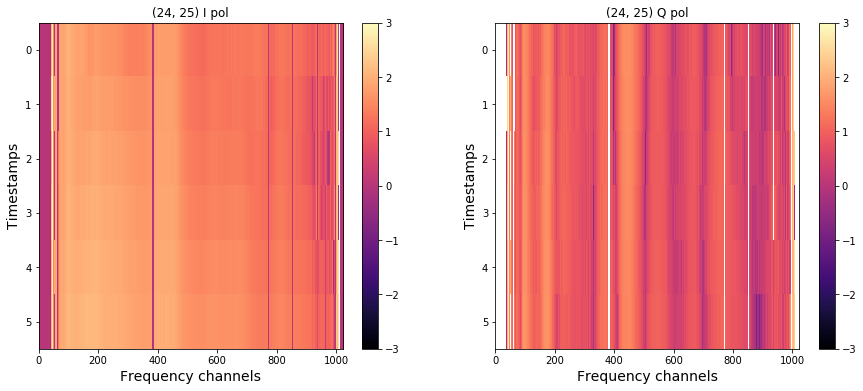

In [5]:
dataI = uvdI.get_data(24, 38)
dataQ = uvdQ.get_data(24, 38)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(hspace=0.3)

ax = axes[0]
ax.set_title('(24, 25) I pol')
cax = ax.imshow(np.log10(np.abs(dataI)), aspect='auto', vmin=-3, vmax=3, cmap='magma')
fig.colorbar(cax, ax=ax)
ax.set_ylabel('Timestamps', fontsize=14)
ax.set_xlabel('Frequency channels', fontsize=14)

ax = axes[1]
ax.set_title('(24, 25) Q pol')
cax = ax.imshow(np.log10(np.abs(dataQ)), aspect='auto', vmin=-3, vmax=3, cmap='magma')
fig.colorbar(cax, ax=ax)
ax.set_ylabel('Timestamps', fontsize=14)
ax.set_xlabel('Frequency channels', fontsize=14)

## Estimating the Power Spectra

Estimating polarized power spectra is identical to estimating the power spectra for linear dipole polarizations, except one needs to feed the `pols` argument of `PSpecData.pspec()` appropriately. See the `PS_estimation_example` notebook for details.